In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import kagglehub
import os

In [ ]:
path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

print("Path to dataset files:", path)

100%|██████████| 1.08M/1.08M [00:00<00:00, 83.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/versions/2


In [ ]:
os.listdir(path)

['ai_job_dataset1.csv', 'ai_job_dataset.csv']

In [ ]:
df = pd.read_csv(path + '/ai_job_dataset.csv')
display(df)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [ ]:
df.drop(columns=['salary_currency'])

,job_id,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


In [ ]:
cols_to_encode = [
    'experience_level',
    'employment_type',
    'job_title',
    'company_location',
    'company_size',
    'employee_residence',
    'education_required',
    'industry'
]

encoders = {}

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

joblib.dump(encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [ ]:
df = df.drop(columns=[
    'company_name',
    'benefits_score',
    'job_description_length',
    'application_deadline',
    'posting_date',
    'job_id',
    'required_skills',
    'salary_currency',
])


In [ ]:
display(df)

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,industry
0,3,90376,3,0,3,1,3,50,1,9,0
1,4,61895,0,0,2,1,9,100,2,1,9
2,5,152626,2,1,17,0,15,0,0,2,2
3,16,80215,3,1,8,1,8,50,3,7,1
4,1,54624,0,3,6,2,14,100,2,0,9
...,...,...,...,...,...,...,...,...,...,...,...
14995,19,38604,0,1,5,2,5,50,1,1,3
14996,15,57811,0,0,18,1,18,0,2,0,6
14997,16,189490,1,0,15,0,15,50,0,17,8
14998,12,79461,0,2,12,1,12,0,3,1,10


In [ ]:
y = df['salary_usd']

X = df.drop(columns=['salary_usd'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.8729491915421861
RMSE: 21526.222284195388


In [ ]:
df['salary_usd'].mean()

np.float64(115348.96513333333)

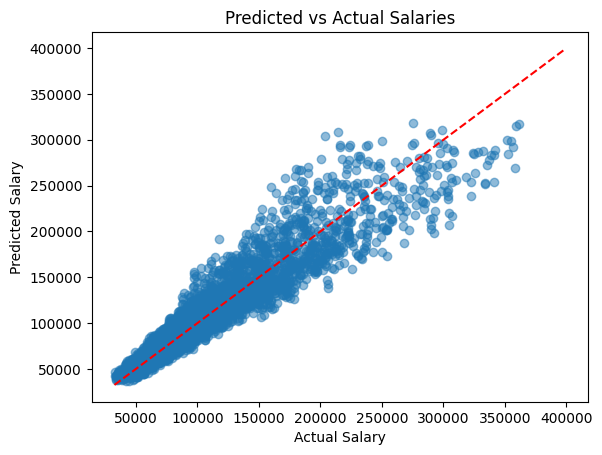

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs Actual Salaries")
plt.show()


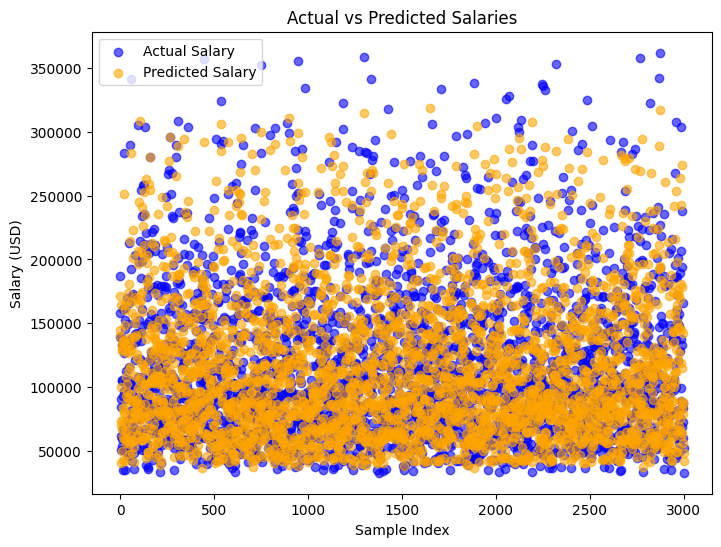

In [ ]:
plt.figure(figsize=(8,6))

# Actual values (y_test) vs index
plt.scatter(range(len(y_test)), y_test, color="blue", alpha=0.6, label="Actual Salary")

# Predicted values (y_pred) vs index
plt.scatter(range(len(y_pred)), y_pred, color="orange", alpha=0.6, label="Predicted Salary")

plt.xlabel("Sample Index")
plt.ylabel("Salary (USD)")
plt.title("Actual vs Predicted Salaries")
plt.legend()
plt.show()

In [ ]:
row = df.drop(columns=['salary_usd']).iloc[[14997]]

predicted_salary = model.predict(row)
print("Predicted Salary (USD):", predicted_salary[0])


Predicted Salary (USD): 171034.64


In [ ]:
joblib.dump(model, "salary_predictor.pkl")

['salary_predictor.pkl']